

https://mp.weixin.qq.com/s/8uUxvIR7XjW2JymvHWsYwg
https://blog.csdn.net/u013719780/article/details/78352262 


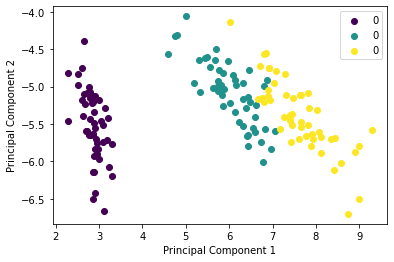

In [1]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np
%matplotlib inline

def shuffle_data(X, y, seed=None):
   if seed:
     np.random.seed(seed)

   idx = np.arange(X.shape[0])
   np.random.shuffle(idx)

   return X[idx], y[idx]

# 正规化数据集 X
def normalize(X, axis=-1, p=2):
   lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
   lp_norm[lp_norm == 0] = 1
   return X / np.expand_dims(lp_norm, axis)
# 标准化数据集 X
def standardize(X):
   X_std = np.zeros(X.shape)
   mean = X.mean(axis=0)
   std = X.std(axis=0)

   # 做除法运算时请永远记住分母不能等于 0 的情形
   # X_std = (X - X.mean(axis=0)) / X.std(axis=0)
   for col in range(np.shape(X)[1]):
     if std[col]:
       X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
   return X_std
# 划分数据集为训练集和测试集
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
   if shuffle:
     X, y = shuffle_data(X, y, seed)
   n_train_samples = int(X.shape[0] * (1-test_size))
   x_train, x_test = X[:n_train_samples], X[n_train_samples:]
   y_train, y_test = y[:n_train_samples], y[n_train_samples:]

   return x_train, x_test, y_train, y_test

# 计算矩阵 X 的协方差矩阵
def calculate_covariance_matrix(X, Y=np.empty((0,0))):
   if not Y.any():
      Y = X
   n_samples = np.shape(X)[0]
   covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))
   return np.array(covariance_matrix, dtype=float)
# 计算数据集 X 每列的方差
def calculate_variance(X):
   n_samples = np.shape(X)[0]
   variance = (1 / n_samples) * np.diag((X - X.mean(axis=0)).T.dot(X - X.mean(axis=0)))
   return variance
# 计算数据集 X 每列的标准差
def calculate_std_dev(X):
   std_dev = np.sqrt(calculate_variance(X))
   return std_dev


# 计算相关系数矩阵
def calculate_correlation_matrix(X, Y=np.empty([0])):
   # 先计算协方差矩阵
   covariance_matrix = calculate_covariance_matrix(X, Y)
   # 计算 X, Y 的标准差
   std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
   std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
   correlation_matrix = np.divide(covariance_matrix, std_dev_X.dot(std_dev_y.T))

   return np.array(correlation_matrix, dtype=float)

class PCA():
   """
   主成份分析算法 PCA，非监督学习算法.
   """
   def __init__(self):
     self.eigen_values = None
     self.eigen_vectors = None
     self.k = 2

   def transform(self, X):
     """
     将原始数据集 X 通过 PCA 进行降维
     """
     covariance = calculate_covariance_matrix(X)

     # 求解特征值和特征向量
     self.eigen_values, self.eigen_vectors = np.linalg.eig(covariance)

     # 将特征值从大到小进行排序，注意特征向量是按列排的，即 self.eigen_vectors 第 k 列是 self.eigen_values 中第 k 个特征值对应的特征向量
     idx = self.eigen_values.argsort()[::-1]
     eigenvalues = self.eigen_values[idx][:self.k]
     eigenvectors = self.eigen_vectors[:, idx][:, :self.k]
     # 将原始数据集 X 映射到低维空间
     X_transformed = X.dot(eigenvectors)

     return X_transformed

def main():
   # Load the dataset
   data = datasets.load_iris()
   X = data.data
   y = data.target

   # 将数据集 X 映射到低维空间
   X_trans = PCA().transform(X)

   x1 = X_trans[:, 0]
   x2 = X_trans[:, 1]

   cmap = plt.get_cmap('viridis')
   colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

   class_distr = []
   # Plot the different class distributions
   for i, l in enumerate(np.unique(y)):
       _x1 = x1[y == l]
       _x2 = x2[y == l]
       _y = y[y == l]
       class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

   # Add a legend
   plt.legend(class_distr, y, loc=1)

   # Axis labels
   plt.xlabel('Principal Component 1')
   plt.ylabel('Principal Component 2')
   plt.show()

if __name__ == "__main__":
   main()